### Text Mining - Mini Project 3

#### Team Members:

- Purva Desai, Dixit Kumar
- Sai Phani Ram, Popuri - 2205577
- Mohammed abdul, Fahad- 2191130

### Download essential libraries

In [1]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# pip install --upgrade scipy
!pip install --upgrade numpy
# !pip install gensim
# !pip install spacy
# !pip install pyLDAvis


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


### Importing necessary modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re
import string

# Preprocessing libraries
import os
import nltk
import time
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk import ngrams
from wordcloud import WordCloud

# Gensim library
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

# Libraries for visualization
import pyLDAvis
import pyLDAvis.gensim

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
'''
The below function reads a given .txt file line by line.
If the sentence contains 'Document NYTF ...', it is an indication that the article has ended.
We have made use of the .find() method to check for the occurrence of 'Document NYTF'
All the articles are appended to the top-level list.

The return value looks like:
article_list = [article1, article2, .......... article n]

'''

"\nThe below function reads a given .txt file line by line.\nIf the sentence contains 'Document NYTF ...', it is an indication that the article has ended.\nWe have made use of the .find() method to check for the occurrence of 'Document NYTF'\nAll the articles are appended to the top-level list.\n\nThe return value looks like:\narticle_list = [article1, article2, .......... article n]\n\n"

In [4]:
# Crawls through the directory and reads all the files present inside it.
def article_separator(dir_path):
    articles_list = []
    count = 0
    for root, folders, files in os.walk(dir_path):
        for file in files:
            # print('Reading the file ', file)
            file_path = os.path.join(root, file)
            article = ''
            with open(file_path, 'rb') as f:
                # Reads the file line by line for improved efficiency.
                for sentence in f.readlines():
                    if all(doc not in sentence.decode() for doc in ('Document NYTF', 'Document WSJO', 'Document J')):
                        article += sentence.decode('utf8', 'replace')
                    else:
                        articles_list.append(article)
                        article = ''     
    return articles_list

In [5]:
# Path to the raw text files -- Please update this while running on your machine

articles_list = article_separator('/Users/beingrampopuri/Desktop/Personal/Spring 2023/CIS 6397 - Text Mining/Miniproject 3/Articles')

In [6]:
print('Total count of articles: ', len(articles_list))

Total count of articles:  1391


In [7]:
print('Sample article view: \n', articles_list[0][:200])

Sample article view: 
  


National Desk; SECTA
Trump Adopting Hands-Off Style Toward Military

By MICHAEL R. GORDON 
1,414 words
20 March 2017
The New York Times
NYTF
Late Edition - Final
1
English
Copyright 2017 The New Y


In [8]:
import re
import string

def article_cleanser(article):
    # Lowercase text
    article = article.lower()
    # Remove HTML tags
    html_tags = re.compile('<.*?>')
    article = re.sub(html_tags, '', article)
    # Remove text within [] and ()
    article = re.sub('\[.*?\]', '', article)
    article = re.sub('\(.*?\)', '', article)
    # Remove Punctuation marks
    article = re.sub('[%s]' % re.escape(string.punctuation), '', article)
    article = re.sub('\w*\d\w*', '', article)
    # Remove extra characters such as single quotes and double quotes
    article = re.sub('[‘’“”…—]', '', article)
    # Remove escape characters like next line, tab space, etc
    article = re.sub('[\n\t\r\d]', ' ', article)
    
    '''
    Every article consists of metadata that starts from the first line and ends with 'all rights reserved'
    Therefore, we are eliminating all the text that forms the metadata.
    '''   
    # Removing the metadata
    article = re.sub('^(.*?)(all rights reserved)', '', article)
    
    # Removes the left and right spaces of the text.
    article = article.lstrip().rstrip()
    return article

In [9]:
# This will call the article_cleanser function above
def preprocessor(article_list):
    cleaned_articles = []
    for article in articles_list:
        cleaned_article = article_cleanser(article)
        cleaned_articles.append(cleaned_article)
    return cleaned_articles

In [10]:
# Returns the list of all the preprocessed articles

cleaned_articles = preprocessor(articles_list)

In [11]:
# Sample view of the article 1 after cleaning

cleaned_articles[0][:100]

'washington  president trump is shifting more authority over military operations to the pentagon acco'

In [12]:
# Converts the input text string into tokens
def word_tokenizer(corpus):
    corpus_tokens = word_tokenize(corpus)
    return corpus_tokens

In [13]:
# Writes the stop words to the file 'Stopwords.txt'
def write_to_file(stopwords):
    with open('Stopwords.txt', 'w') as file:
        for word in stopwords:
            file.write(word + '\n')

In [14]:
# Fetches the stop words from 'English' lang in NLTK library
def get_stopwords_english():
    stop_words = set(stopwords.words('english'))
    print('Count of stop words: ', len(stop_words))
    return stop_words

In [15]:
# Fetches the multilingual stop words from NLTK library
def get_stopwords():
    # fileids() returns all the languages present in the NLTK library.
    languages = stopwords.fileids()
    global_stop_words = []
    try:
        temp = []
        for lang in languages:
            lang_stop_words = set(stopwords.words(lang))
            temp.append(lang_stop_words)
    except:
        print('Encontered an error with : ', lang)
    
    for sublist in temp:
        for word in sublist:
            global_stop_words.append(word)
    
#   write_to_file(global_stop_words)
    print('Count of stop words: ', len(global_stop_words))
    return global_stop_words

In [16]:
%%time

'''
Tokenization:

tokens_list: List of lists of articles. (Top level list)
article_tokens: tokens of individual articles.

'''
tokens_list = []
for article in cleaned_articles:
    article_tokens = word_tokenizer(article)
    tokens_list.append(article_tokens)

CPU times: user 4.44 s, sys: 39 ms, total: 4.48 s
Wall time: 4.48 s


In [17]:
%%time

'''
Stop word removal
'''

# Fetches the stop words from the function
stop_words = get_stopwords()
def remove_stopwords(tokens_list):
    return [[token for token in article_tokens if token not in stop_words] for article_tokens in tokens_list]

Count of stop words:  10204
CPU times: user 5.84 ms, sys: 2.63 ms, total: 8.47 ms
Wall time: 9.07 ms


In [18]:
# Processed tokens after removing all the stop words

all_tokens_without_stop = remove_stopwords(tokens_list)

In [19]:
# Sample list of all the tokens after stop word removal

all_tokens_without_stop[0][:20]

['washington',
 'president',
 'trump',
 'shifting',
 'authority',
 'military',
 'operations',
 'pentagon',
 'white',
 'house',
 'officials',
 'reversing',
 'aides',
 'generals',
 'tendency',
 'obama',
 'white',
 'house',
 'micromanage',
 'issues']

In [20]:
%%time

# Unwind all the tokens into one list for analyzing data.
# unified_tokens: All tokens in one list

unified_tokens = []
for sublist in all_tokens_without_stop:
    for token in sublist:
        unified_tokens.append(token)

CPU times: user 70.3 ms, sys: 4.07 ms, total: 74.3 ms
Wall time: 73.2 ms


In [21]:
print('Length of all the tokens in the corpus: ', len(unified_tokens))

Length of all the tokens in the corpus:  865378


In [22]:
# Returns the list of most frequent words as per the requirement
def freq_Distribution(processed_tokens, top_word_count):
    top_words = FreqDist(processed_tokens).most_common(top_word_count)
    return top_words

In [23]:
# Function to generate the bar graphs or count plot of frequent words

def generate_bar_graph(freq_dict):
    plt.figure(figsize=(6, 4))
    plt.title("Top 30 unigrams in corpus", fontsize=10)
    sns.barplot(y = list(freq_dict.values()), x = list(freq_dict.keys()))
    plt.xlabel('Most Repeating Words')
    plt.xticks(rotation = 90)
    plt.ylabel('Average Frequency')
    plt.grid(visible = False)
    plt.show()

In [24]:
# Function to generate the word cloud for clusters

def generate_word_cloud(freq_dict):
    try:
        wordcloud = WordCloud(min_word_length =3, background_color='white', max_words = 100)
        wordcloud.generate_from_frequencies(freq_dict)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title('Word Cloud of most common unigrams', size = 10)
        plt.axis('off')
        plt.show()
    except:
        print('An exception occurred while plotting the word cloud.')

In [25]:
def n_grams(unified_tokens, n, words_req):
    if n == 1:
        grams = unified_tokens
    else:
        grams = ngrams(unified_tokens, n)
    print('Top {} {}-grams: \n'.format(words_req, n))
    top_n_grams = FreqDist(grams).most_common(words_req)
    return top_n_grams

In [26]:
# Top 30 unigrams in the corpus

top_30_unigrams = n_grams(unified_tokens, 1, 30)
print(top_30_unigrams)

Top 30 1-grams: 

[('mr', 9788), ('state', 6744), ('trump', 6589), ('islamic', 6157), ('president', 3978), ('syria', 3765), ('states', 3503), ('american', 3461), ('united', 3409), ('military', 3235), ('forces', 2733), ('iraq', 2681), ('government', 2493), ('officials', 2453), ('isis', 2450), ('attack', 2171), ('syrian', 2156), ('group', 2102), ('city', 2097), ('security', 2071), ('years', 1965), ('times', 1931), ('time', 1887), ('country', 1867), ('iraqi', 1860), ('administration', 1759), ('york', 1708), ('news', 1681), ('killed', 1679), ('house', 1589)]


In [27]:
# Convert above list of tuples into frequency dictionary

unigram_dict_30 = dict(top_30_unigrams)

In [28]:
unigram_dict_30

{'mr': 9788,
 'state': 6744,
 'trump': 6589,
 'islamic': 6157,
 'president': 3978,
 'syria': 3765,
 'states': 3503,
 'american': 3461,
 'united': 3409,
 'military': 3235,
 'forces': 2733,
 'iraq': 2681,
 'government': 2493,
 'officials': 2453,
 'isis': 2450,
 'attack': 2171,
 'syrian': 2156,
 'group': 2102,
 'city': 2097,
 'security': 2071,
 'years': 1965,
 'times': 1931,
 'time': 1887,
 'country': 1867,
 'iraqi': 1860,
 'administration': 1759,
 'york': 1708,
 'news': 1681,
 'killed': 1679,
 'house': 1589}

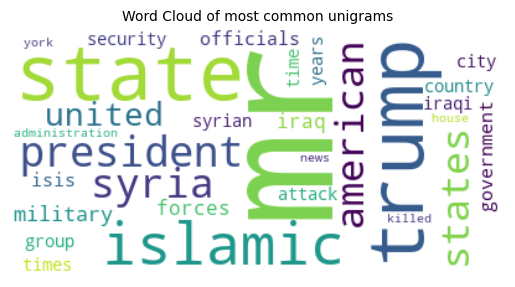

In [29]:
# Word cloud generator for unigrams

generate_word_cloud(unigram_dict_30)

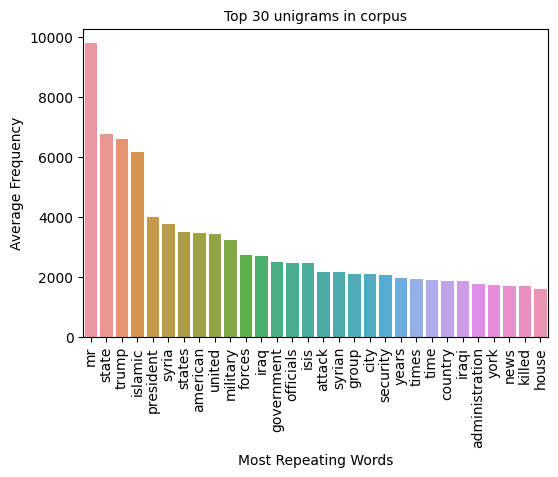

In [30]:
# Bar graph generator for unigrams

generate_bar_graph(unigram_dict_30)

In [31]:
# Top 30 bigrams in the entire corpus

top_30_bi_grams = n_grams(unified_tokens, 2, 30)
print(top_30_bi_grams)

Top 30 2-grams: 

[(('islamic', 'state'), 5276), (('united', 'states'), 2841), (('mr', 'trump'), 2292), (('york', 'times'), 1175), (('white', 'house'), 1007), (('president', 'trump'), 888), (('trump', 'administration'), 633), (('middle', 'east'), 601), (('donald', 'trump'), 569), (('national', 'security'), 496), (('saudi', 'arabia'), 460), (('mr', 'trumps'), 425), (('mr', 'assad'), 419), (('mr', 'obama'), 416), (('prime', 'minister'), 391), (('iraq', 'syria'), 382), (('state', 'fighters'), 382), (('islamic', 'states'), 376), (('obama', 'administration'), 360), (('chemical', 'weapons'), 358), (('dow', 'jones'), 354), (('north', 'korea'), 334), (('iraqi', 'forces'), 328), (('executive', 'order'), 314), (('secretary', 'state'), 305), (('united', 'nations'), 291), (('facebook', 'twitter'), 285), (('social', 'media'), 273), (('barack', 'obama'), 272), (('mr', 'mattis'), 271)]


In [32]:
# Convert above list of tuples into frequency dictionary

bigrams_30_dict = dict(top_30_bi_grams)

In [33]:
print(list(bigrams_30_dict.keys()))

[('islamic', 'state'), ('united', 'states'), ('mr', 'trump'), ('york', 'times'), ('white', 'house'), ('president', 'trump'), ('trump', 'administration'), ('middle', 'east'), ('donald', 'trump'), ('national', 'security'), ('saudi', 'arabia'), ('mr', 'trumps'), ('mr', 'assad'), ('mr', 'obama'), ('prime', 'minister'), ('iraq', 'syria'), ('state', 'fighters'), ('islamic', 'states'), ('obama', 'administration'), ('chemical', 'weapons'), ('dow', 'jones'), ('north', 'korea'), ('iraqi', 'forces'), ('executive', 'order'), ('secretary', 'state'), ('united', 'nations'), ('facebook', 'twitter'), ('social', 'media'), ('barack', 'obama'), ('mr', 'mattis')]


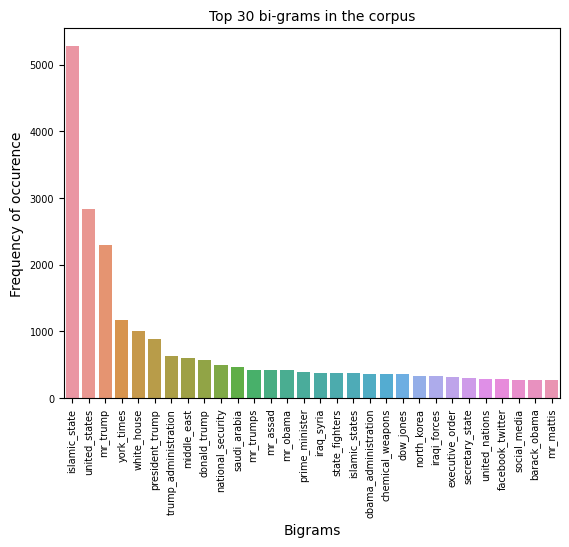

In [34]:
# Bar graph for most frequent bi-grams

# Appending the bigrams into one string

labels = [label[0] + '_' + label[1] for label in list(bigrams_30_dict.keys())]
values = list(bigrams_30_dict.values())

# Creating a dictionary of appended bigrams and frequency
bigram_dict = dict()
for i in range(len(labels)):
    bigram_dict[labels[i]] = values[i]

# Plotting the bigrams
sns.barplot(y = values, x = labels)
plt.title('Top 30 bi-grams in the corpus', fontsize=10)
plt.xlabel('Bigrams', fontsize=10)
plt.ylabel('Frequency of occurence', fontsize=10)
plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(fontsize = 7)
plt.show()

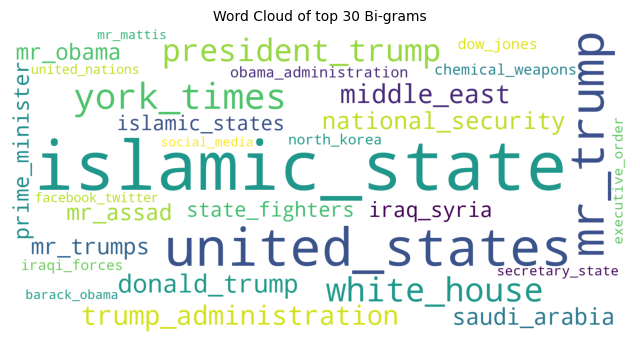

In [35]:
# Generating a word cloud for bigrams using the created bigram dictionary

wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(bigram_dict)

plt.figure(figsize=(8,8))
plt.title('Word Cloud of top 30 Bi-grams', fontsize=10)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
# Perform lemmatization on the tokens

'''
Only keeps the words with parts of speech as either of ('Noun', 'Adjective', 'Verb')
'''

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB']):
    lemmatized_tokens = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        lemmatized_tokens.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return lemmatized_tokens

In [37]:
%%time
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, adv
tokens_lemmatized = lemmatization(all_tokens_without_stop, allowed_postags=['NOUN', 'ADJ'])

CPU times: user 1min 46s, sys: 1.63 s, total: 1min 48s
Wall time: 1min 48s


In [38]:
# Build the bigram and trigram models - higher threshold fewer phrases.
bigram = gensim.models.Phrases(tokens_lemmatized, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[tokens_lemmatized], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [39]:
# Functions to create n_grams

def make_bigrams(tokens_list):
    return [bigram_mod[article_tokens] for article_tokens in tokens_list]

def make_trigrams(tokens_list):
    return [trigram_mod[bigram_mod[article_tokens]] for article_tokens in tokens_list]

In [40]:
token_bigrams = make_bigrams(tokens_lemmatized)

In [41]:
token_bigrams[0]

['authority',
 'military',
 'operation',
 'official',
 'aide',
 'general',
 'micromanage',
 'issue',
 'military',
 'commander',
 'heart',
 'national',
 'security',
 'council',
 'role',
 'leader',
 'mcmaster',
 'belief',
 'focus',
 'military',
 'operation',
 'strategic',
 'issue',
 'president',
 'team',
 'balance',
 'power',
 'world',
 'american',
 'interest',
 'general_mcmaster',
 'focus',
 'foreign',
 'economic',
 'policy',
 'option',
 'concert',
 'agency',
 'challenge',
 'approach',
 'military',
 'operation',
 'evident',
 'month',
 'artillery',
 'battery',
 'team',
 'army',
 'troop',
 'northern',
 'deployment',
 'meeting',
 'force',
 'question',
 'troop',
 'risk',
 'military',
 'raise',
 'question',
 'trump',
 'current',
 'former',
 'general',
 'key',
 'job',
 'administration',
 'sufficient',
 'oversight',
 'president',
 'early',
 'day',
 'back',
 'model',
 'great',
 'delegation',
 'authority',
 'pentagon',
 'top',
 'policy',
 'official',
 'president',
 'executive',
 'american',
 'se

In [42]:
type(token_bigrams)

list

In [43]:
%%time

# Mapping the tokens with those of the dictionary words

id2word = corpora.Dictionary(token_bigrams)

corpus = []
for token_list in token_bigrams:
    new = id2word.doc2bow(token_list)
    corpus.append(new)

CPU times: user 526 ms, sys: 9.41 ms, total: 535 ms
Wall time: 540 ms


In [44]:
type(corpus)

list

In [45]:
corpus[0]

[(0, 1),
 (1, 8),
 (2, 4),
 (3, 2),
 (4, 1),
 (5, 2),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 2),
 (14, 1),
 (15, 1),
 (16, 2),
 (17, 2),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 2),
 (25, 1),
 (26, 4),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 4),
 (38, 1),
 (39, 1),
 (40, 2),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 2),
 (46, 1),
 (47, 2),
 (48, 1),
 (49, 1),
 (50, 2),
 (51, 2),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 3),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 2),
 (71, 1),
 (72, 3),
 (73, 3),
 (74, 2),
 (75, 1),
 (76, 3),
 (77, 1),
 (78, 1),
 (79, 3),
 (80, 5),
 (81, 2),
 (82, 2),
 (83, 3),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 2),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 3),
 (98, 2),
 (99, 1),
 (100, 3),

### Latent Dirichlet Allocation - Topic Model building

In [88]:
# Building the LDA model
'''
As a trail run, 8 topics are selected.

num_topics: No of topics required.
update_every: Number of documents to be iterated through for each update.
passes: Number of times algorithm passes through the corpus.
alpha: A-priori belief on document-topic distribution.

'''

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 8,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=20,
                                           alpha="auto")

### Visualizing the topics

In [89]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)

import warnings
warnings.filterwarnings('ignore')

In [90]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.169661  0.247506       1        1  26.866285
2     -0.106457 -0.248342       2        1  25.326993
0     -0.281787 -0.126142       3        1  18.017368
5     -0.272627  0.074054       4        1  15.108529
6      0.124552 -0.270084       5        1   8.009294
1      0.280942 -0.084136       6        1   5.622394
7      0.243149  0.258251       7        1   1.029582
4      0.181889  0.148893       8        1   0.019554, topic_info=                                                    Term         Freq  \
222                                               attack  2866.000000   
121                                             official  3443.000000   
170                                                state  5758.000000   
97                                               islamic  4526.000000   
111                                             military  2882.000000   
...                                                  ...          ...   
20015  裁判書類によると、彼はfbi捜査官と対面した際、シリア政府と戦っているグループを支持している...     0.044797   
20036                                             altaie     0.044769   
20039  ここ数日はイラク軍がisと市街戦を繰り広げた。。、さらに大量の無反動式砲で爆破したところ、狙...     0.044769   
20040                                           イスラム国」特集     0.044769   
488                                                 word     0.246713   

             Total Category  logprob  loglift  
222    2866.000000  Default  30.0000  30.0000  
121    3443.000000  Default  29.0000  29.0000  
170    5758.000000  Default  28.0000  28.0000  
97     4526.000000  Default  27.0000  27.0000  
111    2882.000000  Default  26.0000  26.0000  
...            ...      ...      ...      ...  
20015     0.925490   Topic8  -7.5718   5.5115  
20036     0.925468   Topic8  -7.5725   5.5109  
20039     0.925468   Topic8  -7.5725   5.5109  
20040     0.925468   Topic8  -7.5725   5.5109  
488     558.034367   Topic8  -5.8657   0.8158  

[514 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
16334      7  0.927933         abusive
967        2  0.117491      additional
967        4  0.822440      additional
967        6  0.058746      additional
1          3  0.303184  administration
...      ...       ...             ...
490        6  0.023938            year
12518      4  0.969630           yield
1182       1  0.037295           young
1182       2  0.742166           young
1182       5  0.220039           young

[881 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 6, 7, 2, 8, 5])

### Analyzing the topics

In [49]:
# Print the Keywords with the repsective weightage in the 10 topics

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

'''
(0,
  '0.034*"state" + 0.029*"islamic" + 0.024*"force" + 0.019*"military" + '
  '0.016*"group" + 0.014*"fighter" + 0.014*"official" + 0.014*"syrian" + '
  '0.014*"government" + 0.013*"iraqi"')

How to read?

In topic 0, the word "state" is the most imp with a weightage of 0.034 
   topic 0, the word "islamic" is the second most imp with a weightage of 0.029 ... 

'''


[(0,
  '0.019*"trump" + 0.012*"president" + 0.011*"year" + 0.009*"week" + '
  '0.009*"lot" + 0.007*"big" + 0.007*"political" + 0.007*"policy" + '
  '0.006*"country" + 0.006*"time"'),
 (1,
  '0.033*"country" + 0.027*"refugee" + 0.018*"muslim" + 0.017*"order" + '
  '0.011*"terrorist" + 0.010*"religious" + 0.009*"ban" + 0.009*"immigration" + '
  '0.009*"executive_order" + 0.008*"citizen"'),
 (2,
  '0.010*"year" + 0.010*"time" + 0.008*"company" + 0.007*"story" + '
  '0.006*"woman" + 0.006*"day" + 0.006*"life" + 0.005*"news" + 0.005*"family" '
  '+ 0.005*"world"'),
 (3,
  '0.034*"state" + 0.029*"islamic" + 0.025*"force" + 0.017*"group" + '
  '0.016*"iraqi" + 0.014*"syrian" + 0.013*"fighter" + 0.013*"city" + '
  '0.012*"government" + 0.012*"militant"'),
 (4,
  '0.004*"、" + 0.003*"」" + 0.003*"word" + 0.003*"。" + 0.002*"関連記事" + 0.001*"「" '
  '+ 0.001*"louise" + 0.001*"トランプ氏が「イスラム国」を「b" + 0.001*"と呼ぶ訳" + '
  '0.001*"radnofsky"'),
 (5,
  '0.032*"official" + 0.024*"military" + 0.017*"state" + '
  

'\n(0,\n  \'0.034*"state" + 0.029*"islamic" + 0.024*"force" + 0.019*"military" + \'\n  \'0.016*"group" + 0.014*"fighter" + 0.014*"official" + 0.014*"syrian" + \'\n  \'0.014*"government" + 0.013*"iraqi"\')\n\nHow to read?\n\nIn topic 0, the word "state" is the most imp with a weightage of 0.034 \n   topic 0, the word "islamic" is the second most imp with a weightage of 0.029 ... \n\n'

### Model Evaluation

In [50]:
'''
Two of the most common metrics used for measuring the topic model's performance
i. Perplexity
ii. Coherence Score
'''



# Compute Perplexity -- a measure of how good the model is. Lower the value better the model.
print('Perplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model = lda_model, texts = token_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', np.round(coherence_lda, 3)) 

Perplexity:  -8.066005505205947


/opt/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/miniconda3/lib/python3.9/site-p

Coherence Score:  0.49517727186628846


### Choosing the optimal number of topics

In [78]:
%%time
Coherence_scores = []
Perplexity_scores = []

for count in range(5, 15):

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics = count,
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha="auto")
    # Compute Perplexity
    Perplexity_scores.append(lda_model.log_perplexity(corpus))
    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model = lda_model, texts = token_bigrams, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    Coherence_scores.append(coherence_lda)

/opt/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/miniconda3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/opt/miniconda3/lib/python3.9/site-p

CPU times: user 5min 1s, sys: 6min 7s, total: 11min 9s
Wall time: 2min 58s


### Plotting the topic count Vs Coherence Score

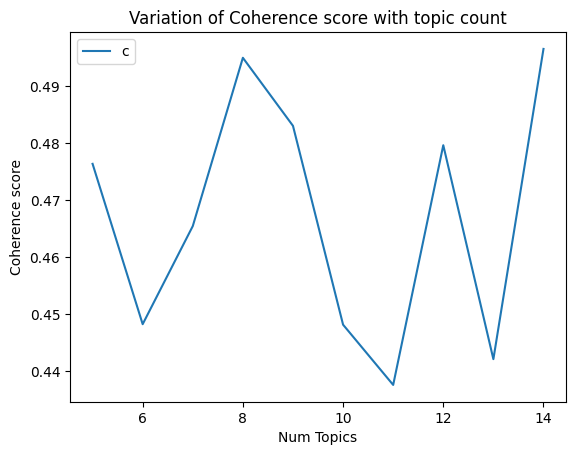

In [91]:
# The number of topics are chosen based on the higest Coherence Score.
# In our case, it is 12.

limit=15; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, Coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Variation of Coherence score with topic count")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [83]:
Coherence_scores

[0.47635901680410075,
 0.4482650915987841,
 0.46545058897898656,
 0.49494144504852655,
 0.48301512228038124,
 0.448179085514989,
 0.4376249674793502,
 0.4796216554624588,
 0.4421388619266162,
 0.49649246386975804]

In [84]:
# Since we are starting from the 5 topics, we have to offset max index with 5.

optimal_no_models = np.argmax(Coherence_scores) + 5

In [85]:
optimal_no_models

14

### Building the model with optimal number of topics

In [86]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= optimal_no_models,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)

import warnings
warnings.filterwarnings('ignore')

### Visualizing the topics and word distributions

In [87]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.073377  0.332595       1        1  30.962810
3     -0.228683  0.359528       2        1  21.928748
10    -0.096281  0.346600       3        1  18.045815
0     -0.359398  0.130509       4        1  12.131735
2      0.218396  0.289803       5        1  10.730197
5      0.335102  0.115420       6        1   3.845331
11    -0.251998 -0.140395       7        1   1.991140
6      0.099697 -0.249371       8        1   0.200161
9      0.061693 -0.190237       9        1   0.060037
8      0.028404 -0.201787      10        1   0.037120
13     0.015845 -0.205825      11        1   0.036054
1      0.037240 -0.197615      12        1   0.023307
7      0.033775 -0.194164      13        1   0.005324
4      0.032831 -0.195061      14        1   0.002220, topic_info=         Term         Freq        Total Category  logprob  loglift
121  official  4018.000000  4018.000000  Default   30.000  30.0000
111  military  3147.000000  3147.000000  Default   29.000  29.0000
591   country  2988.000000  2988.000000  Default   28.000  28.0000
73      force  3813.000000  3813.000000  Default   27.000  27.0000
222    attack  3554.000000  3554.000000  Default   26.000  26.0000
..        ...          ...          ...      ...      ...      ...
25    cabinet     0.000423    57.662397  Topic14  -10.058  -1.1066
26   campaign     0.000423   996.145447  Topic14  -10.058  -3.9559
27    capital     0.000423   411.802800  Topic14  -10.058  -3.0726
28       case     0.000423   968.660009  Topic14  -10.058  -3.9280
29     center     0.000423   487.528565  Topic14  -10.058  -3.2414

[893 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3279      5  0.998413        academic
492       1  0.201439         account
492       3  0.225137         account
492       5  0.571730         account
1603     12  0.743985  acknowledgment
...     ...       ...             ...
490       5  0.099066            year
1182      3  0.189947           young
1182      4  0.738512           young
1182      5  0.069900           young
6925      5  0.992381         youtube

[1120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 4, 11, 1, 3, 6, 12, 7, 10, 9, 14, 2, 8, 5])